In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


    Year  Points
0   2014    27.1
1   2015    25.3
2   2016    25.3
3   2017    26.4
4   2018    27.5
5   2019    27.4
6   2020    25.3
7   2021    25.0
8   2022    30.3
9   2023    28.9
10  2024    25.7
              Year     Points
count    11.000000  11.000000
mean   2019.000000  26.745455
std       3.316625   1.700802
min    2014.000000  25.000000
25%    2016.500000  25.300000
50%    2019.000000  26.400000
75%    2021.500000  27.450000
max    2024.000000  30.300000
predicted points for year 2025: 27.69
predicted points for year 2026: 27.85


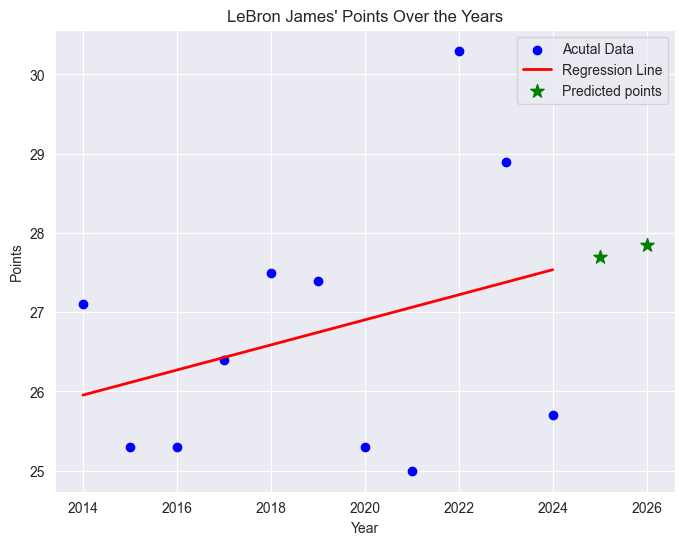

In [3]:
# Initialize an empty list to store LeBron's points data
lebron_data = []

# Loop through each year from 2014 to 2024 and collect the points data
for year in range(2014, 2025):
    filename = f'csv/{year}_NBA.csv'
    playerData = pd.read_csv(filename)

    # Filter for LeBron James
    lebron_playerData = playerData[playerData['Player'] == 'LeBron James']

    # Extract the points and minutes per game data

    lebron_pts_data = lebron_playerData['PTS'].values[0] 
    lebron_MP_data = lebron_playerData['MP'].values[0]
    lebron_data.append({
        'Year' : year,
        'Points': lebron_pts_data,
    })
lebron_df = pd.DataFrame(lebron_data)
print(lebron_df)
print(lebron_df.describe(include='all'))

# Data for modeling
X = lebron_df[['Year']] # independant variable
y = lebron_df['Points'] # dependent variable

from sklearn.linear_model import LinearRegression
# Create a linear regression model and fit the independent and dependent variables
model = LinearRegression()
model.fit(X,y)

# predict points in 2025 and 2026, if he does not retire
predicted_years = pd.DataFrame({'Year':[2025,2026]})
predicted_points = model.predict(predicted_years)

# print predicted points for future years
for year, points in zip(predicted_years['Year'], predicted_points):
    print(f"predicted points for year {year}: {points:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Acutal Data')
plt.plot(X, model.predict(X), color='red', linestyle='-', linewidth=2, label='Regression Line')
plt.scatter(predicted_years, predicted_points, color='green', marker='*', s=100, label='Predicted points')
plt.title('LeBron James\' Points Over the Years')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()